In [260]:
# importing all the necessary libraries which are use
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
# the the csv file which contain all the spam and ham Emails

Email = pd.read_csv('Spam Email Detection - spam.csv')
Email

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [265]:
# it will describe the data like total counts for a cloumns and etc 

Email.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5163,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [266]:
# it will show all the information the type of column like all the columns are of object type and also we can 
# clearly see that  Unnamed: 2 ,Unnamed: 3 ,Unnamed: 4 are of object type and unnecessary columns so drop it  
Email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [267]:
# droping unnecessary columns

Email =Email.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
Email

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [268]:
# loking for null values
Email.isnull().sum()

v1    0
v2    0
dtype: int64

In [269]:
# looking for duplicate values
Email.duplicated().value_counts()

False    5163
True      409
Name: count, dtype: int64

In [270]:
# remove duplicate values
Email = Email.drop_duplicates(subset='v2', keep='first')

In [271]:
Email.duplicated().sum()

0

In [272]:
Email.shape

(5163, 2)

# EDA

In [273]:
Email.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [274]:
# import waring 
import warnings
warnings.filterwarnings('ignore')

# here we are renaming the column name
Email.rename(columns = {'v1':'label','v2':'email_message'},inplace=True)

In [275]:
Email

,label,email_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [276]:
Email['label'].value_counts()

label
ham     4516
spam     647
Name: count, dtype: int64

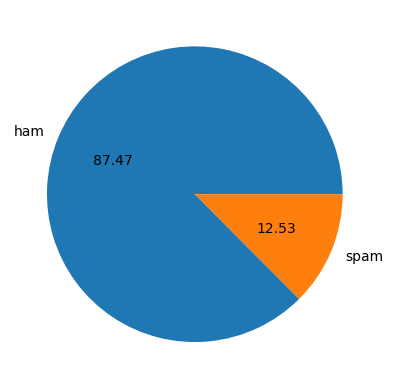

In [277]:
plt.pie(Email['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [278]:
4516+647

5163

In [279]:
(4516/5163)*100

87.46852605074568

In [280]:
(647/5163)*100

12.531473949254309

In [281]:
# Balanced OR imbalanced
# if the ratio is not 60 40 # then it is a imbalance data 

In [282]:
spam = Email[Email['label'] == 'spam']
ham = Email[Email['label'] == 'ham']

In [283]:
spam.shape,ham.shape

((647, 2), (4516, 2))

In [284]:
ham = ham.sample(1000)  # randomely select 1000 records

In [285]:
spam.shape,ham.shape

((647, 2), (1000, 2))

In [286]:
Email_data =  pd.concat([ham,spam],axis =0) ## to conbine data in one data frame
Email_data.head()

,label,email_message
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
4647,ham,We are okay. Going to sleep now. Later
2730,ham,I havent lei.. Next mon can?
3361,ham,No messages on her phone. I'm holding it now
4565,ham,Should i buy him a blackberry bold 2 or torch....


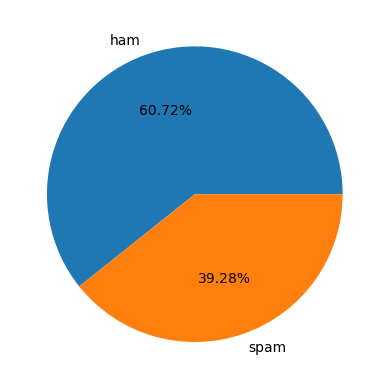

In [287]:
plt.pie(Email_data['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [288]:
Email_data.head(5)

,label,email_message
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
4647,ham,We are okay. Going to sleep now. Later
2730,ham,I havent lei.. Next mon can?
3361,ham,No messages on her phone. I'm holding it now
4565,ham,Should i buy him a blackberry bold 2 or torch....


In [289]:
Email_data.shape

(1647, 2)

In [290]:
### text clening 
import re ## regular expression

In [291]:
# index reassign and delete the 
Email_data.reset_index(drop=True,inplace=True) 

In [292]:
Email_data['email_message']

0       Funny fact Nobody teaches volcanoes 2 erupt, t...
1                  We are okay. Going to sleep now. Later
2                            I havent lei.. Next mon can?
3            No messages on her phone. I'm holding it now
4       Should i buy him a blackberry bold 2 or torch....
                              ...                        
1642    Want explicit SEX in 30 secs? Ring 02073162414...
1643    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1644    Had your contract mobile 11 Mnths? Latest Moto...
1645    REMINDER FROM O2: To get 2.50 pounds free call...
1646    This is the 2nd time we have tried 2 contact u...
Name: email_message, Length: 1647, dtype: object

In [293]:
Email_data['email_message'][0]

'Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens'

In [294]:
#a-z . A-Z
re.sub('[^a-zA-Z ]','',Email_data['email_message'][0]).lower()

'funny fact nobody teaches volcanoes  erupt tsunamis  arise hurricanes  sway aroundn no  teaches hw  choose a wife natural disasters just happens'

In [295]:
for i in range(len(Email_data)):
    Email_data['email_message'][i] = re.sub('[^a-zA-Z ]', '',Email_data['email_message'][i]).lower()


In [296]:
Email_data.head()

,label,email_message
0,ham,funny fact nobody teaches volcanoes erupt tsu...
1,ham,we are okay going to sleep now later
2,ham,i havent lei next mon can
3,ham,no messages on her phone im holding it now
4,ham,should i buy him a blackberry bold or torch s...


In [297]:
labels = list(Email_data['label'])
temp_labels = [1 if item =="spam" else 0 for item in labels]
Email_data['label'] = temp_labels

In [298]:
# label ham = 0 and spam= 1  without using Map() function
#for i in range(len(Email_data)):
#    if Email_data['label'][i] == 'ham':
#        Email_data['label'][i] = 0
#    else:
#        Email_data['label'][i] = 1

In [299]:
## list comprehension
#[1 if i == 'spam' else 0 for i in labels]

In [300]:
Email_data.head()

,label,email_message
0,0,funny fact nobody teaches volcanoes erupt tsu...
1,0,we are okay going to sleep now later
2,0,i havent lei next mon can
3,0,no messages on her phone im holding it now
4,0,should i buy him a blackberry bold or torch s...


In [301]:
# this is done by using map funciton 
# label_dict = {'ham':0,'spam':1}
# Email_data['label'] =  Email.data['label'].map(label_dict)

In [302]:
Email_data['label']

0       0
1       0
2       0
3       0
4       0
       ..
1642    1
1643    1
1644    1
1645    1
1646    1
Name: label, Length: 1647, dtype: int64

In [303]:
x = Email_data['email_message']
y = Email_data['label']

In [304]:
x = x.values

In [305]:
bow_obj = CountVectorizer(max_features = 1500,stop_words='english')


In [306]:
X = bow_obj.fit_transform(x)

In [307]:
# interview point  asked by recuter
X

<1647x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 11375 stored elements in Compressed Sparse Row format>

In [308]:
# to see the output of X use Toarray()
X = X.toarray()


In [309]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [310]:
# matrix 
#1: sparse matrix
#2: Dense matrix 

In [311]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1642    1
1643    1
1644    1
1645    1
1646    1
Name: label, Length: 1647, dtype: int64

In [312]:
X.shape, y.shape

((1647, 1500), (1647,))

In [313]:
 from sklearn.model_selection import train_test_split

In [314]:
# training and testing spliting
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.15)

In [315]:
# if clasiffication then superwise 
x_train.shape,y_train.shape

((1399, 1500), (1399,))

In [316]:
# for text classification  probleam statement  we use Naive bayes algorithem
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [317]:
#y_train =  np.array(y_train,dtype=int)

In [318]:
# object Creatioin
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [319]:
x_train.shape , y_train.shape 

((1399, 1500), (1399,))

In [320]:
## training algorithms
bnb.fit(x_train,y_train)
print("BernoulliNB Trained")

gnb.fit(x_train,y_train)
print("GaussianNB training")

mnb.fit(x_train,y_train)
print("MultinomialNB Trained")

BernoulliNB Trained
GaussianNB training
MultinomialNB Trained


In [321]:
print("MultinomialNB Training score : ",bnb.score(x_train,y_train)*100)
print("MultinomialNB Testing score : ",bnb.score(x_test,y_test)*100)

print()

print("BernoulliNB Training score : ",gnb.score(x_train,y_train)*100)
print("BernoulliNB Testing score : ",gnb.score(x_test,y_test)*100)

print()

print("GaussianNB Training score : ",mnb.score(x_train,y_train)*100)
print("GaussianNB Testing score : ",mnb.score(x_test,y_test)*100)

MultinomialNB Training score :  95.71122230164403
MultinomialNB Testing score :  95.96774193548387

BernoulliNB Training score :  98.35596854896355
BernoulliNB Testing score :  96.7741935483871

GaussianNB Training score :  96.64045746962115
GaussianNB Testing score :  96.7741935483871


In [322]:
## prediction
x_test.shape

(248, 1500)

In [323]:
prediction=mnb.predict(x_test)

In [324]:
pred = list(prediction)
actual=list(y_test)
comparison_df = pd.DataFrame({'Actual':actual,'Prediction':pred})
comparison_df.head(40)

,Actual,Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


In [325]:
from sklearn.metrics import confusion_matrix, classification_report


In [326]:
matrix=confusion_matrix(comparison_df['Actual'],comparison_df['Prediction'])
matrix

array([[156,   2],
       [  6,  84]], dtype=int64)

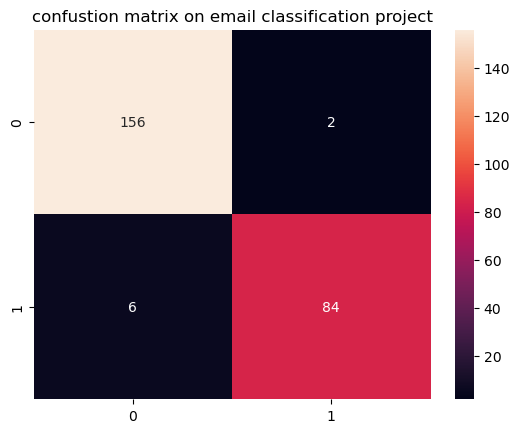

In [327]:
sns.heatmap(matrix,annot=True,fmt='d')
plt.title('confustion matrix on email classification project')
plt.show()

In [328]:
print(classification_report(comparison_df['Actual'],comparison_df['Prediction']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.98      0.93      0.95        90

    accuracy                           0.97       248
   macro avg       0.97      0.96      0.96       248
weighted avg       0.97      0.97      0.97       248



### saving our models and algorithems

In [329]:
import os,joblib

In [330]:
os.makedirs('models',exist_ok=True)

In [331]:
##
joblib.dump(bnb,"./models/bernouliNB.lb")
joblib.dump(gnb,"./models/gasussianNB.lb")
joblib.dump(mnb,"./models/multinomialNB.lb")

['./models/multinomialNB.lb']

In [332]:
## bow_obj

joblib.dump(bow_obj,'./models/bag_of_words.lb')

['./models/bag_of_words.lb']

In [360]:
print(Email_data[Email_data['label']== 1])

      label                                      email_message
1000      1  free entry in  a wkly comp to win fa cup final...
1001      1  freemsg hey there darling its been  weeks now ...
1002      1  winner as a valued network customer you have b...
1003      1  had your mobile  months or more u r entitled t...
1004      1  six chances to win cash from  to  pounds txt c...
...     ...                                                ...
1642      1  want explicit sex in  secs ring  now costs pmi...
1643      1  asked mobile if  chatlines inclu in free mins ...
1644      1  had your contract mobile  mnths latest motorol...
1645      1  reminder from o to get  pounds free call credi...
1646      1  this is the nd time we have tried  contact u u...

[647 rows x 2 columns]


# The End 😁